# Supervised Learning


This hands-on session is split into **2 parts**: a (very) short one with synthetic data to experiment a bit with SVM models, and a longer one aiming at predicting avalanches from wheater data (based on real data).




In [52]:
# Viz
import matplotlib.pyplot as plt


# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


import pandas as pd
import numpy as np



# Preliminaries on synthetic data

The goal here is to experience the examples seen during the lecture, concerning the robustness to outliers.

Below is a synthetic dataset, and you'll learn an SVM classifier and see what happens when having outliers.

In [53]:

# make 2-class dataset for classification
centers = [[-10, 0], [10, 0]]
x, y = make_blobs(n_samples=100, centers=centers, random_state=40)


# Add some biasing points
center_noise = [[10, 4], [-10, -4]]
x_noise, y_noise = make_blobs(n_samples=3, centers=center_noise, random_state=4, cluster_std=0.1)
xbiased = np.concatenate((x,x_noise))
ybiased = np.concatenate((y,y_noise))


Visualize the dataset with a scatter plot, and plot the margins with various soft margin strenghts. The soft margins strengths in the ```SVC``` function are controlled with the parameter ```C```. Try values in the range ```[0,1]``` and report a value of strenght that looks like this figure :  ![title](svm.png)

/tmp/ipython-input-865/1600799478.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap("RdBu"),
/tmp/ipython-input-865/1600799478.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
/tmp/ipython-input-865/1600799478.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  xbiased[:, 0], xbiased[:, 1], c=ybiased*0.5, zorder=10, cmap=plt.cm.get_cmap("brg"), edgecolors="k"
/tmp/ipython-input-865/1600799478.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or `

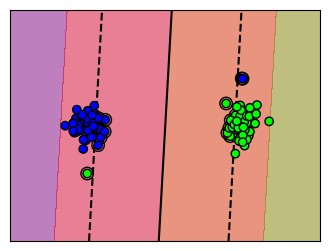

/tmp/ipython-input-865/1600799478.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap("RdBu"),
/tmp/ipython-input-865/1600799478.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
/tmp/ipython-input-865/1600799478.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  xbiased[:, 0], xbiased[:, 1], c=ybiased*0.5, zorder=10, cmap=plt.cm.get_cmap("brg"), edgecolors="k"
/tmp/ipython-input-865/1600799478.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or `

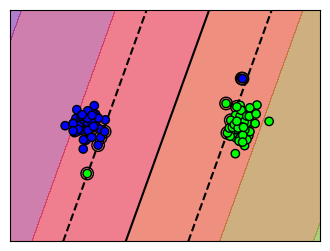

/tmp/ipython-input-865/1600799478.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap("RdBu"),
/tmp/ipython-input-865/1600799478.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
/tmp/ipython-input-865/1600799478.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  xbiased[:, 0], xbiased[:, 1], c=ybiased*0.5, zorder=10, cmap=plt.cm.get_cmap("brg"), edgecolors="k"
/tmp/ipython-input-865/1600799478.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or `

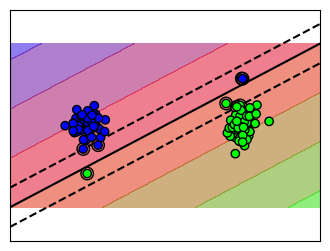

/tmp/ipython-input-865/1600799478.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap("RdBu"),
/tmp/ipython-input-865/1600799478.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
/tmp/ipython-input-865/1600799478.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  xbiased[:, 0], xbiased[:, 1], c=ybiased*0.5, zorder=10, cmap=plt.cm.get_cmap("brg"), edgecolors="k"
/tmp/ipython-input-865/1600799478.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or `

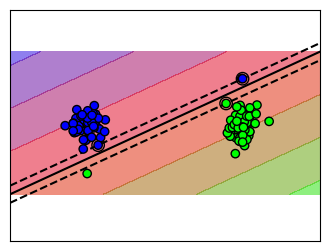

In [54]:


# Function for plotting dataset, decision rule and margins of a SVM classifier
def plot_svm(clf,x,y):
    # Adapted from https://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-20, 20)
    yy = a * xx - (clf.intercept_[0]) / w[1]
    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin
    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(1, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, "k-")
    plt.plot(xx, yy_down, "k--")
    plt.plot(xx, yy_up, "k--")
    plt.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=80,
        facecolors="none",
        zorder=10,
        edgecolors="k",
        cmap=plt.cm.get_cmap("RdBu"),
    )
    plt.scatter(
        xbiased[:, 0], xbiased[:, 1], c=ybiased*0.5, zorder=10, cmap=plt.cm.get_cmap("brg"), edgecolors="k"
    )
    plt.axis("tight")
    x_min = -20
    x_max = 20
    y_min = -10
    y_max = 10
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Put the result into a contour plot
    plt.contourf(XX, YY, Z, cmap=plt.cm.get_cmap("brg"), alpha=0.5, linestyles=["-"])
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()



# fit the model
penalties  = [0.001,0.01, 0.1, 1]
for penalty in penalties:
    clf = svm.SVC(kernel='linear',C = penalty)
    clf.fit(xbiased, ybiased)
    plot_svm(clf,xbiased,ybiased)


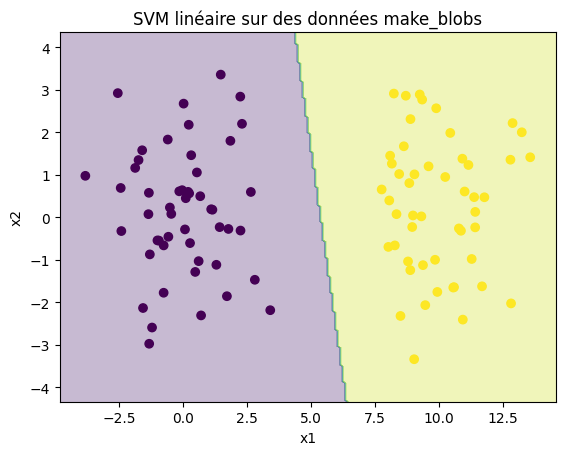

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import svm

# 1️⃣ Génération des données
X, y = make_blobs(
    n_samples=100,
    centers=[(0, 0), (10, 0)],
    cluster_std=1.5,
    random_state=0
)

# 2️⃣ Entraînement du SVM linéaire
clf = svm.SVC(kernel="linear")
clf.fit(X, y)

# 3️⃣ Création de la grille pour tracer la frontière
xx = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 200)
yy = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 200)
XX, YY = np.meshgrid(xx, yy)
Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)

# 4️⃣ Plot
plt.figure()
plt.contourf(XX, YY, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("SVM linéaire sur des données make_blobs")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

What is the benefit of setting this penalty when fitting the model? How do you quantify the robustness of the decision rule?

Answer:

To what model parameter the following figure corresponds to:  ![title](svm0.png)
    
What is the name of this model?
#TO COMPLETE


# Avalanche dataset

We now focus on real data. The goal is is to predict an avalanche from weather data. The dataset is a real dataset which has been built by Ensimag students in 2019, through a "Projet de spécialité". Thanks to their work, we can now enjoy predicting avalanches for free.

They scrapped data from different sources, and only retain here the part of the data related to cross-country ski-related avalanches.

We will use the following descriptors (names should be explicit enough, given that dens menans density and  rad, radiation):

`"6am_temp","16pm_temp","precip","snow_fall","snow_dens","snow_depth","solar_rad"`


In [56]:
#Import the dataset


data = pd.read_csv("avalanche_data.csv", header = 0)
# Balance the labels (as many 1 and 0) -> we drop many non-avalanche events
balanced_data = data[0:2448].sample(frac=1).to_numpy()
header = ["id","avalanche","data_source","orientation","date","long","lat","6am_temp","16pm_temp","precip","snow_fall","snow_dens","snow_depth","solar_rad"
]

# Data descriptors
raw_data = balanced_data[:, 7:14].astype(float)
#normalize the data using preprocessing.StandardScaler() call
scaler = preprocessing.StandardScaler()
x =scaler.fit_transform(raw_data)
kept_headers = header[7:14]
y = balanced_data[:,1].astype(int) # y=1 means avalanche, y=0 means no avalanche



Take a look at the data: make a PCA, colored by class (avalanche or not). Is there a chance that we can classify our data?


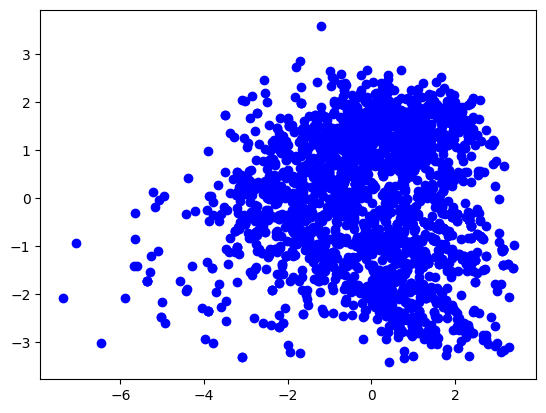

In [64]:
pca = PCA(n_components=2)
X_PCA = pca.fit_transform(x)#TO COMPLETE (1 expression)
plt.clf()
plt.scatter(X_PCA[:,0],X_PCA[:,1],c="blue") # color is y
plt.show()




Please comment on the structure of the data: will it be easy to predict avalanches or not? Why?

## Classification

### SVM
Learn a simple classifier: an SVM for instance. Show some useful statistics on the performances.



In [75]:

# Create a classifier: a support vector classifier
svm_avalanche =svm.SVC(kernel ="linear")#TO COMPLETE (1 expression)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.5, shuffle=True
)

# Learn the digits on the train subset
#TO COMPLETE
svm_avalanche.fit(X_train, y_train)
# Predict the value of the digit on the test subset
predicted_svm = svm_avalanche.predict(X_test)
svm_avalanche.score(X_test,y_test)

0.8120915032679739

Now you can optimize your classifier by changing the kernel, the `gamma` parameter of the RBF (Gaussian) kernel, as well as the soft margins. Find optimal parameters that optimize the performances on the validation set.

In [78]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn import svm

# 1) Split train/test (50/50 comme ton énoncé)
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.5, shuffle=True, stratify=y, random_state=0
)

# 2) Modèle de base
svc = svm.SVC()

# 3) Grille de paramètres à tester
param_grid = [
    {"kernel": ["linear"], "C": [0.01, 0.1, 1, 10, 100, 1000]},
    {"kernel": ["rbf"], "C": [0.01, 0.1, 1, 10, 100, 1000],
     "gamma": [1e-4, 1e-3, 1e-2, 1e-1, 1, "scale", "auto"]},
    {"kernel": ["poly"], "C": [0.1, 1, 10, 100],
     "gamma": [1e-3, 1e-2, 1e-1, "scale"], "degree": [2, 3, 4]}
]

# 4) Validation croisée sur le TRAIN (ça = "validation set" via CV)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

grid = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    scoring="accuracy",   # ou "f1" si classes déséquilibrées (mais tu dis équilibré)
    cv=cv,
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Meilleurs paramètres:", grid.best_params_)
print("Score validation (CV):", grid.best_score_)

# 5) Évaluation finale sur TEST
best_model = grid.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Score test:", test_score)

Meilleurs paramètres: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Score validation (CV): 0.8701037136165942
Score test: 0.8660130718954249


### Interpretable models

We want to get a bit of insights of why there are avalanches, so we are going to use decision trees/random forest.

#### Decision tree

Make a [decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) with few leaves (e.g. 3) so that we can interpret easily the decisions.


In [ ]:
tree_avalanche = DecisionTreeClassifier(#TO COMPLETE (1 expression)
tree_avalanche.fit(X_train, y_train)
predicted_tree =#TO COMPLETE (1 expression)
accuracy_tree_test =#TO COMPLETE (1 expression)
print(f"Accuracy on test set : { accuracy_tree_test}")

predicted_train_tree = tree_avalanche.predict(X_train)
accuracy_tree_train =#TO COMPLETE (1 expression)
print(f"Accuracy on train set : { accuracy_tree_train}")

The good thing with decision tree is that we can visualize the decisions. Use the command `tree.plot_tree`, setting the flag `filled=True` for more readability.

In [ ]:
#TO COMPLETE
plt.show()

Interpret the decision in terms of what it means physically, by matching the decision indicies with the headers (contained in the var `kept_headers`).

Answer:

If we want to increase the accuracy, we will have to make more splits... which is an issue as pointed out in the lectures. Verify this fact by yourself by monitoring the difference of accuracy between the train and validation set. When does it overfit?


In [ ]:
accuracy_train = list()
accuracy_test = list()

leaves =#TO COMPLETE (1 expression)

for nb_leaf in leaves:
    tree_avalanche = DecisionTreeClassifier(max_leaf_nodes=nb_leaf,#TO COMPLETE (1 expression)
#TO COMPLETE
    predicted_tree_validation =#TO COMPLETE (1 expression)
    predicted_tree_train =#TO COMPLETE (1 expression)
    accuracy_test +=#TO COMPLETE (1 expression)
    accuracy_train +=#TO COMPLETE (1 expression)



plt.clf()
plt.plot(leaves,accuracy_train,leaves,accuracy_test)
plt.show()

Answer:


#### Random forest

We switch to [random forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to see if we can get better accuracy without overfitting. Give a reason why RF are less prone to overfitting:

Answer:

In [ ]:

accuracy_train = list()
accuracy_test = list()

leaves =#TO COMPLETE (1 expression)

for nb_leaf in leaves:
    rf_avalanche = RandomForestClassifier(max_leaf_nodes=nb_leaf,#TO COMPLETE (1 expression)
#TO COMPLETE
    predicted_rf_validation =#TO COMPLETE (1 expression)
    predicted_rf_train =#TO COMPLETE (1 expression)
    accuracy_test +=#TO COMPLETE (1 expression)
    accuracy_train +=#TO COMPLETE (1 expression)



plt.clf()
plt.plot(leaves,accuracy_train,leaves,accuracy_test)
plt.show()

Comment on your results:

We cannot anymore visualize the tree, but we can **check the feature importance**. Take a look at the attribute `feature_importances_` of your random forest. What is the meaning of these numbers? Which feature look the most important?

In [ ]:
#TO COMPLETE
